In [60]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import os
import jieba
import numpy as np
from PIL import Image
import random
import jieba.analyse

In [14]:
file_path = "/home/lijiuliang/JupyterNotebook/C-tensorflow_env/data"
file_name = 'constitution.txt'

# 英文词云

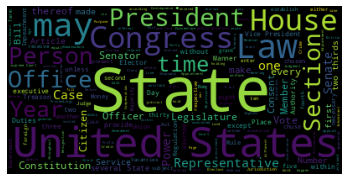

In [22]:

# 1.打开文本
text = open(os.path.join(file_path, file_name)).read()

# 2.生成对象
wc = WordCloud().generate(text)

# 3.显示词云
plt.imshow(wc)
plt.axis('off')
plt.show()

# 4.保存文件
wc.to_file(os.path.join(file_path, 'wordcloud_en.png'))

# 中文词云

In [23]:
file_name = 'xyj.txt'

## 普通词云

　 　 [ 西游记   /   吴承恩 （ 明 ）   著   ] 
 
 　 　 书籍 介绍 : 
 　 　 《 西游记 》 以 丰富 瑰奇 的 想象 描写 了 师徒 四众 在 迢遥 的 西方 途上


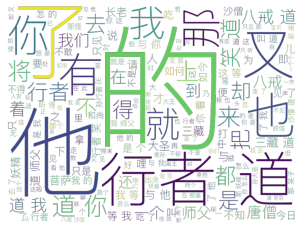

In [37]:
# 1.打开文本
text = open(os.path.join(file_path, file_name)).read()

# 2.中文分词
text = ' '.join(jieba.cut(text))
print(text[:100])

# 3.生成对象（自定义显示字体、显示图片尺寸、显示颜色模式）
wc = WordCloud(font_path=myfont_path, width=800, height=600, mode='RGBA', background_color=None).generate(text)

# 4.显示词云
plt.imshow(wc)
plt.axis('off')
plt.show()

# 5.保存文件
wc.to_file(os.path.join(file_path, 'wordcloud_zh.png'))

## 设置蒙版，生成指定形状的词云

　 　 [ 西游记   /   吴承恩 （ 明 ）   著   ] 
 
 　 　 书籍 介绍 : 
 　 　 《 西游记 》 以 丰富 瑰奇 的 想象 描写 了 师徒 四众 在 迢遥 的 西方 途上


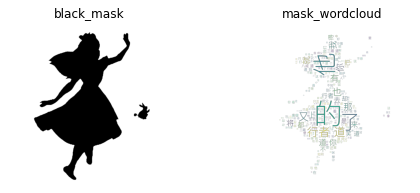

In [55]:
# 1.打开文本
text = open(os.path.join(file_path, file_name)).read()

# 2.中文分词
text = ' '.join(jieba.cut(text))
print(text[:100])

# 3.生成对象
myfont_path = '/home/lijiuliang/.local/share/fonts/pingfangsc-thin.otf' # 指定中文字体路径
mask_img_name = 'black_mask.png'
mymask = np.array(Image.open(os.path.join(file_path, mask_img_name)))
wc = WordCloud(mask=mymask, font_path=myfont_path, width=800, height=600, mode='RGBA', background_color=None).generate(text)

# 4.显示词云
plt.subplots(nrows=1, ncols=2, figsize=(8, 3), dpi=72) #绘制一行两列的画布

plt.subplot(1, 2, 1) # 第一个子图
plt.title('black_mask') # 子图标题
plt.imshow(plt.imread(os.path.join(file_path, mask_img_name)), plt.cm.gray) # 绘制第一幅子图,且为灰度图
plt.axis('off')

plt.subplot(1, 2, 2) # 第二个子图
plt.title('mask_wordcloud')
plt.imshow(wc)
plt.axis('off')

plt.show() # 显示画布窗口

# 5.保存文件
wc.to_file(os.path.join(file_path, 'wordcloud_mask.png'))

## 获取蒙版颜色，生成对应颜色词云

　 　 [ 西游记   /   吴承恩 （ 明 ）   著   ] 
 
 　 　 书籍 介绍 : 
 　 　 《 西游记 》 以 丰富 瑰奇 的 想象 描写 了 师徒 四众 在 迢遥 的 西方 途上


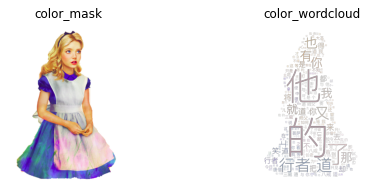

In [58]:
# 中文词云-词云与蒙版相同位置将呈现相同颜色

# 1.打开文本
text = open(os.path.join(file_path, file_name)).read()

# 2.中文分词
text = ' '.join(jieba.cut(text))
print(text[:100])

# 3.生成对象
myfont_path = '/home/lijiuliang/.local/share/fonts/pingfangsc-thin.otf' # 指定中文字体路径
mask_img_name = 'color_mask.png'
mymask = np.array(Image.open(os.path.join(file_path, mask_img_name)))
wc = WordCloud(mask=mymask, font_path=myfont_path, width=800, height=600, mode='RGBA', background_color=None).generate(text)

# 4.从蒙版图片中生成颜色
image_colors = ImageColorGenerator(mymask)
wc.recolor(color_func=image_colors)

# 5.显示词云
plt.subplots(nrows=1, ncols=2, figsize=(8, 3), dpi=72) #绘制一行两列的画布

plt.subplot(1, 2, 1) # 第一个子图
plt.title('color_mask') # 子图标题
plt.imshow(plt.imread(os.path.join(file_path, mask_img_name))) # 绘制第一幅子图
plt.axis('off')

plt.subplot(1, 2, 2) # 第二个子图
plt.title('color_wordcloud')
plt.imshow(wc)
plt.axis('off')

plt.show() # 显示画布窗口

# 6.保存文件
wc.to_file(os.path.join(file_path, 'wordcloud_color_mask.png'))

## 自定义颜色

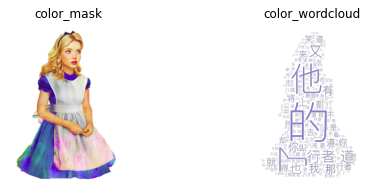

In [59]:
# 0.自定义颜色函数(H-色相，S-饱和度，L-亮度)
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(245, %d%, %d%%)' % (random.randint(40, 80), random.randint(40, 80))

# 1.打开文本
text = open(os.path.join(file_path, file_name)).read()

# 2.中文分词
text = ' '.join(jieba.cut(text))

# 3.生成对象
myfont_path = '/home/lijiuliang/.local/share/fonts/pingfangsc-thin.otf' # 指定中文字体路径
mask_img_name = 'color_mask.png'
mymask = np.array(Image.open(os.path.join(file_path, mask_img_name)))
wc = WordCloud(color_func=random_color, mask=mymask, font_path=myfont_path, width=800, height=600, mode='RGBA', background_color=None).generate(text)

# 4.显示词云
plt.subplots(nrows=1, ncols=2, figsize=(8, 3), dpi=72) #绘制一行两列的画布

plt.subplot(1, 2, 1) # 第一个子图
plt.title('color_mask') # 子图标题
plt.imshow(plt.imread(os.path.join(file_path, mask_img_name))) # 绘制第一幅子图
plt.axis('off')

plt.subplot(1, 2, 2) # 第二个子图
plt.title('color_wordcloud')
plt.imshow(wc)
plt.axis('off')

plt.show() # 显示画布窗口

# 5.保存文件
wc.to_file(os.path.join(file_path, 'wordcloud_color_DIY.png'))

## 精细控制词云中出现的词，以及每个词的大小

[('行者', 0.13267208087376123), ('八戒', 0.060545784492521626), ('师父', 0.05548787651373802), ('三藏', 0.04881099376082701), ('大圣', 0.03393280864329511), ('唐僧', 0.03049170994138356), ('沙僧', 0.028239337327820406), ('菩萨', 0.027923172773813284), ('妖精', 0.025040478734388093), ('和尚', 0.02224147041243598), ('那怪', 0.020501777748003852), ('甚么', 0.02041031848558598), ('那里', 0.019449387366471244), ('长老', 0.018936486818456447), ('呆子', 0.017720452196271354), ('怎么', 0.016808465831007834), ('徒弟', 0.016589847268665824), ('不知', 0.01656892529856913), ('老孙', 0.015984555806169972), ('悟空', 0.015943237776945278)]


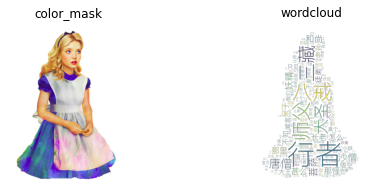

In [61]:
# 1.打开文本
text = open(os.path.join(file_path, file_name)).read()

# 2.基于 TF-IDF 算法的关键词抽取
freq = jieba.analyse.extract_tags(text, topK=200,  withWeight=True) # 返回前200个 TF/IDF 权重最大的关键词以及权重
print(freq[:20])
freq = {word:weight for word, weight in freq}

# 3.生成对象
myfont_path = '/home/lijiuliang/.local/share/fonts/pingfangsc-thin.otf' # 指定中文字体路径
mask_img_name = 'color_mask.png'
mymask = np.array(Image.open(os.path.join(file_path, mask_img_name)))
wc = WordCloud(mask=mymask, font_path=myfont_path, 
               width=800, height=600, mode='RGBA', background_color=None).generate_from_frequencies(freq)

# 4.显示词云
plt.subplots(nrows=1, ncols=2, figsize=(8, 3), dpi=72) #绘制一行两列的画布

plt.subplot(1, 2, 1) # 第一个子图
plt.title('color_mask') # 子图标题
plt.imshow(plt.imread(os.path.join(file_path, mask_img_name))) # 绘制第一幅子图
plt.axis('off')

plt.subplot(1, 2, 2) # 第二个子图
plt.title('wordcloud')
plt.imshow(wc)
plt.axis('off')

plt.show() # 显示画布窗口

# 5.保存文件
wc.to_file(os.path.join(file_path, 'wordcloud_font.png'))